# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project investigates over 10,000 movies collected from The Movie Database. These movies span from as early as 1966 to 2015. The columns in the dataset are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage,	director, tagline,	keywords,	overview,	runtime,	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year,	budget_adj,	revenue_adj.
We would be looking at all the different genres to see if we can perform some analysis based on other variables.


### Question(s) for Analysis
> 1. Which genre had the highest voter average?
> 2. What is the most popular genre?
> 3. What is the most produced genre?
> 4. Which year released the most movies?
> 5. What is the relationship between Revenue and Budget?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
# Data Wrangling



### Load Data

In [2]:
df_movies = pd.read_csv('tmdb_movies.csv')

df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### remove unnecessary columns with a function

In [3]:
x_columns = ['id','imdb_id','cast','homepage','director', 'production_companies','tagline','keywords','overview']

def drop_columns(col, Dframe):
    for col in x_columns:
        Dframe.drop(columns=col, axis=1, inplace=True)

drop_columns(x_columns, df_movies)



In [4]:
df_movies.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### check for duplicates 

In [5]:
sum(df_movies.duplicated())

1

### drop duplicates

In [6]:
df_movies.drop_duplicates(inplace=True)

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


### check out null values in genres

In [8]:
df_movies[df_movies.genres.isnull()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


### drop null row values

In [9]:
df_movies.dropna(inplace = True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10842 non-null  float64
 1   budget          10842 non-null  int64  
 2   revenue         10842 non-null  int64  
 3   original_title  10842 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
 10  budget_adj      10842 non-null  float64
 11  revenue_adj     10842 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


### Under genres column, remove first pipe sign and all characters after it to simplify categorization

In [10]:
df_movies["genres"] = [genre[0] for genre in df_movies["genres"].str.split("|")]


### check to see if first pipe sign and characters after have been removed

In [11]:
df_movies.head(20)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,156,Western,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,141,Drama,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,91,Family,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,94,Comedy,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


### understanding the dataset

In [12]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


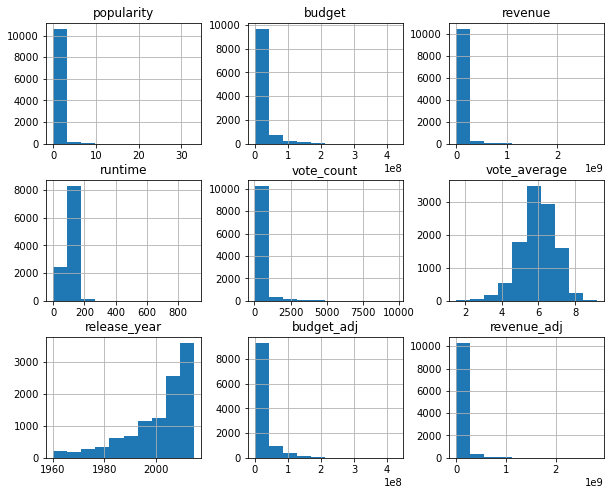

In [24]:
df_movies.hist(figsize = (10,8));

According to the dataset statistics, there are some conclusions worth taking note of. The average Popularity score was 0.65 The mean vote_average also stood at 5.97. The voter_average or ratings of a movie fall between 1.5 and 9.2 The average runtime of a movie was 120 minutes. The most movies produced were released after year 2005. These are confirmed also with the histograms skweing above.


<a id='eda'></a>


## Exploratory Data Analysis



### 1. Which genre had the highest voter average?
It is important to know which genres had the highest voter ratings on average. This helps viewers to decide which movie genre to watch or not. Although these ratings are subjective in nature, it is important to find out which genre ranked top.

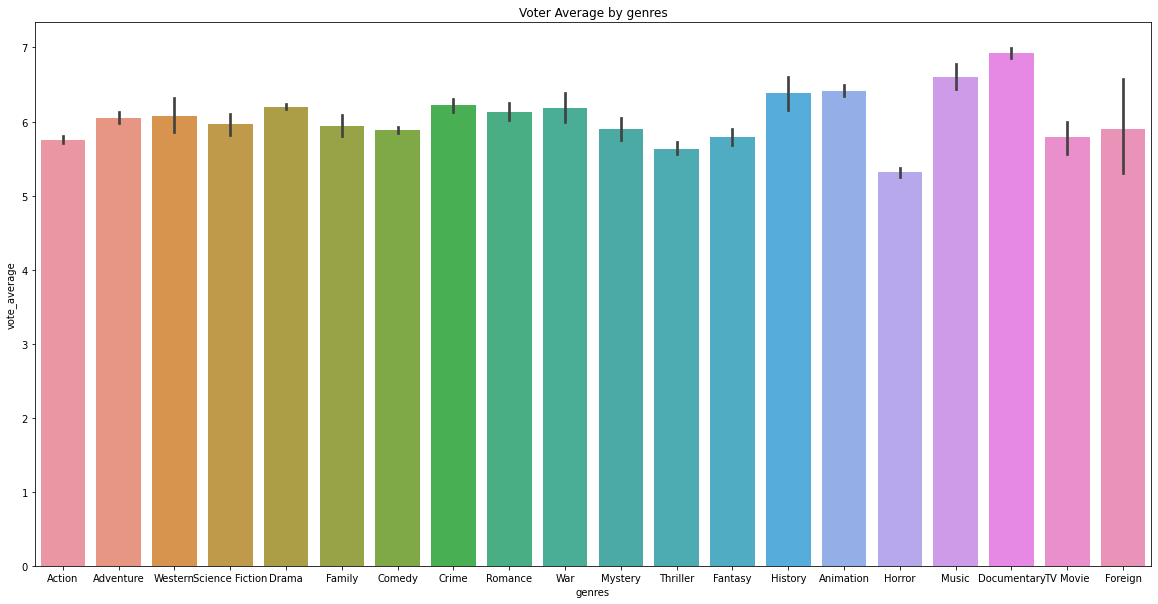

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_movies,x="genres", y="vote_average")
plt.title('Voter Average by genres');

From the bar chart above, No genre vote ratings were below 6.5. The range of voter average fell between 6.5 and 7. The Genre with the highest voter average among the lot was Documentary.

### 2. What is the most popular genre?

We need to know which genre of movies were popular among the masses. It is important to know this because it can help  filmmakers to know which type/genre of movies to produce in the future if they want to clearly make an impact in the industry. The bar chart below investigates this.

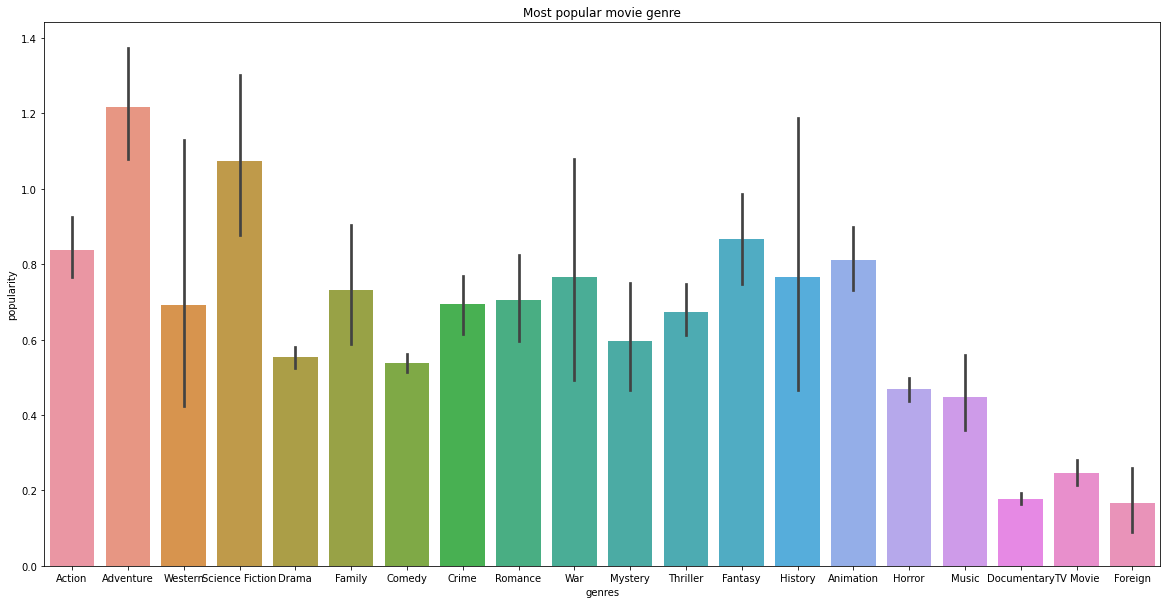

In [14]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_movies,x="genres", y="popularity")
plt.title('Most popular movie genre');

According to the bar chart above, Adventure movies were very popular.History and Science Fiction were also very popular as well. The least popular genres were TV movie, Documentary and Foreign. These results are evident in the bar chart which are denoted by the tallest and shortest bars.


### 3. What is the most produced genre?

The bar chart investigates the most produced genre over the years. It is important to understand why a lot more movies are from a particular genre. We need to know if it was by popular demand? Based on Budget? Revenue it generates? 

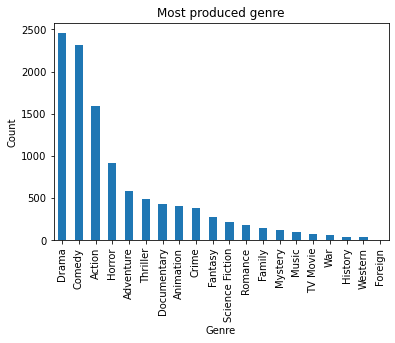

In [15]:
df_movies['genres'].value_counts()
df_movies['genres'].value_counts().plot(kind='bar');
plt.title('Most produced genre');
plt.ylabel('Count');
plt.xlabel('Genre');

From the barchart, the most produced genre was Drama, a total of 2,453 movies followed by Comedy 2,319 and Action, 1,590. The least produced genre was History with 44 movies, Western,42 and Foreign, 9. 

### 4. Which year released the most movies?

We need to understand and know which year saw the highest number of movies released and why this happened. Might this huge growth be caused by an increase in supply or demand? This will allow us to further probe into the reason for such high number.


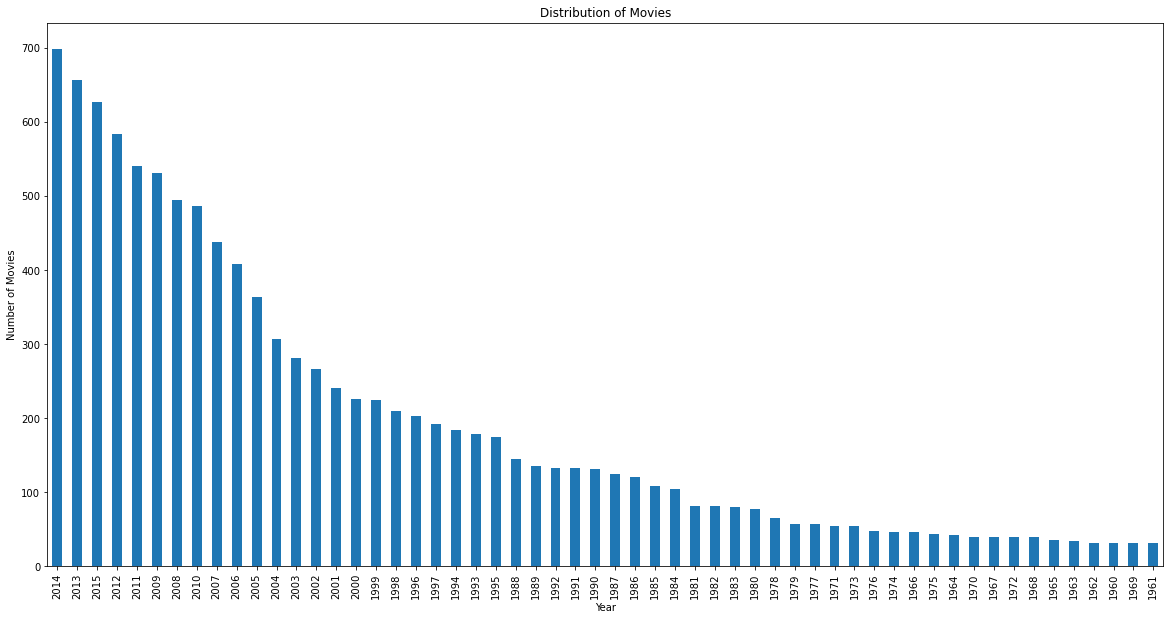

In [16]:
df_movies['release_year'].value_counts()
df_movies['release_year'].value_counts().plot(kind='bar', figsize=(20,10));
plt.title('Distribution of Movies');
plt.ylabel('Number of Movies');
plt.xlabel('Year');

This chart shows the most number of movies released in all the years. The year 2014 saw the release of the most movies, followed by 2013, 2015, 2012 and 2011. Although from the highest  to the lowest movies released by year are not sequential, overall there has been a massive and sturdy rise in the number of movies released from 1966 to 2015. In 2014, there were 699 movies released, that is three times more the number in 2002 which was 226.

### 5. What is the relationship between Revenue and Budget?

We need to understand if there is a positive, negative or no correlation between Adjusted Revenue and Adjusted Budget of movies produced.

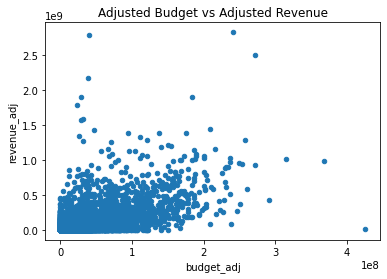

In [17]:
df_movies.plot(x='budget_adj', y='revenue_adj', kind='scatter');
plt.title('Adjusted Budget vs Adjusted Revenue');



There is a positive correlation between the adjusted revenue of a movie and the adjusted budget of that movie. This means that the more monies are spent for the production of a movie, the more revenue that movie generates. This is indicated by the spread in direction of the scatter plot i.e. positively sloped


<a id='conclusions'></a>
## Conclusions

> Based on the Exploratory analysis of the dataset, we can deduce that the genre which had the highest average of voter ratings was Documentary. But the most popular genre was Adventure with Documentary being part of the least popular. We can say that the  genres with the highest voter average aren't the most popular genres.

> Also the most produced genre within the given range of years was Drama with 2453 movies. The least produced genre over the past 49 years was Foreign with only 9 movies. 

> The year 2014 saw the release of a lot of movies. It can be concluded that overall, there was an increase in the number of movies produced over the years.

### Limitations

>There were some null values/rows in my dataset, specifically the genres column which became a limitation to my analysis. Because the values were not known and could  not be guessed they had to be removed to have a consistent dataset. There was also a duplicate row which had to be removed as well.Also, the genres column had multiple genres for a movie. I had to take just the first type of genre and discard the rest for easy categorization.




In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1